# Домашняя работа №1

In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import warnings
import math

from matplotlib import pyplot as plt
from scipy import linalg


warnings.filterwarnings("ignore")

## Задание 1

Изобразите с помощью matplotlib. Изобразите точку x + 2y + 3z. Найдите угол между векторами x, y и x, z. 

In [2]:
x = np.array([1,1])
y = np.array([2, 0])
z = np.array([0,2])

In [5]:
v = x + 2 * y + 3 * z
v

array([5, 7])

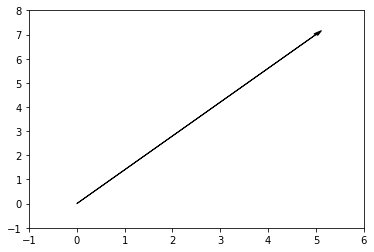

In [6]:
ax = plt.axes()

plt.xlim( [-1, 6] )
plt.ylim( [-1, 8] )

ax.arrow(0, 0, v[0], v[1], head_width = 0.1, 
         head_length = 0.2, fc = 'k', ec = 'k')
plt.show()

In [13]:
def angle(A, B):
    # длины векторов
    A_length = np.linalg.norm(A)
    B_length = np.linalg.norm(B)
    
    if (A_length * B_length) != 0:
        return round(np.arccos(np.dot(A, B) / (A_length * B_length)) * 180 / np.pi, 2)
    else:
        return 0

In [15]:
angle(x,y)

45.0

In [16]:
angle(x,z)

45.0

## Задание 2

Загрузите модель человека. Найдите расстояние от правой кисти до позвоночника

In [18]:
ns = ['type', 'x', 'y', 'z']
# read points for joints
dfJointsVertexes = pd.read_csv('joints.txt', sep=' ', names = ns)
axis_sort = 'x' 
df = dfJointsVertexes.sort_values(by=[axis_sort])

In [19]:
df.head()

,type,x,y,z
21,v,-0.392414,0.045288,0.025403
20,v,-0.283883,0.219551,-0.024912
19,v,-0.163721,0.476657,-0.030335
18,v,-0.163721,0.476657,-0.030335
17,v,-0.163721,0.476657,-0.030335


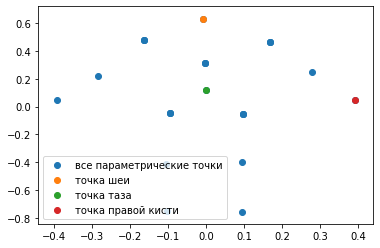

In [52]:
plt.scatter(df.x, df.y)

plt.scatter(df.x[11], df.y[11])
plt.scatter(df.x[0], df.y[0])
plt.scatter(df.x[16], df.y[16])

plt.legend(['все параметрические точки', 'точка шеи', 'точка таза', 'точка правой кисти'])

In [53]:
# вектор spine - вектор позвоночника (составлен как разность одного вектора из другого)
spine = np.array([df.x[11] - df.x[0], df.y[11] - df.y[0]])

In [54]:
# вектор right_mitt - вектор правой кисти
right_mitt = np.array([df.x[16],df.y[16]])

In [71]:
length_spine = np.abs(spine)
length_spine 

array([7.78982760e-05, 2.58494964e-01])

In [62]:
np.dot(spine,np.transpose(spine))

0.25857286205200014

In [63]:
np.linalg.norm(spine)

0.5085006018206862

In [74]:
# строим проекцию данной точки right_mitt на вектор spine: projection
projection = 0 + (np.dot(right_mitt,spine)) / np.dot(spine,np.transpose(spine))*spine
projection 

array([-0.00064771,  0.0373115 ])

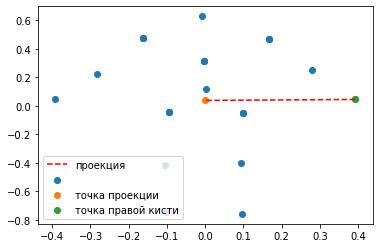

In [75]:
# линия между spine и projection
plt.plot([right_mitt[0],projection[0]],[right_mitt[1],projection[1]],'r--',linewidth = 1.5)
plt.scatter(df.x, df.y)
plt.scatter(projection[0], projection[1])
plt.scatter(right_mitt[0], right_mitt[1])
plt.legend(['проекция', '', 'точка проекции', 'точка правой кисти'])

In [76]:
linalg.norm(projection - right_mitt)

0.39237981903974056

# Задание 3

Найдите собственные значения и собственные вектора матриц (необходимо решение на numpy). Для матрицы 3x3 можно посмотреть на корни характеристического многочлена, посчитанные в numpy.

In [77]:
m1 = np.array([[2, 2],
               [1, 3]])

m2 = np.array([[4, 1, -1],
               [1, 4, -1],
               [-1, -1, 4]])

In [96]:
from numpy import linalg as LA

e_vals, e_vecs = LA.eig(m1)
print('Исходная матрица: \n', m1)

e_vecs = np.transpose(e_vecs)  # теперь собственные векторы будут располагаться в строках

print('Собственные вектора: \n', e_vecs)
print('Собственные значения: ', e_vals)

Исходная матрица: 
 [[2 2]
 [1 3]]
Собственные вектора: 
 [[-0.89442719  0.4472136 ]
 [-0.70710678 -0.70710678]]
Собственные значения:  [1. 4.]


Проверка:

In [103]:
# Первое собственное число (labmda_1 = 1)
print(np.dot(m1, e_vecs[0]))
print(e_vals[0] * e_vecs[0])

[-0.89442719  0.4472136 ]
[-0.89442719  0.4472136 ]


In [104]:
# Второе собственное число (labmda_2 = 4)
print(np.dot(m1, e_vecs[1]))
print(e_vals[1] * e_vecs[1])

[-2.82842712 -2.82842712]
[-2.82842712 -2.82842712]


In [105]:
from numpy import linalg as LA

e_vals, e_vecs = LA.eig(m2)
print('Исходная матрица: \n', m2)

e_vecs = np.transpose(e_vecs)  # теперь собственные векторы будут располагаться в строках

print('Собственные вектора: \n', e_vecs)
print('Собственные значения: ', e_vals)

Исходная матрица: 
 [[ 4  1 -1]
 [ 1  4 -1]
 [-1 -1  4]]
Собственные вектора: 
 [[-0.81649658  0.40824829 -0.40824829]
 [ 0.57735027  0.57735027 -0.57735027]
 [-0.27658128  0.8035929   0.52701162]]
Собственные значения:  [3. 6. 3.]
